In [20]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [39]:
df = pd.read_csv('movie.csv', encoding='euc-kr')
df

,Unnamed: 0,X,영화명,개봉일,매출액,관객수,스크린수,대표국적,배급사,영화명_공백X,영화코드,장르,main_genre
0,1,1,명량,20140730,135748398910,17613682,1587.0,한국,씨제이이앤엠(주),명량,20129370,사극 액션,사극
1,2,2,극한직업,20190123,139647979516,16264944,1978.0,한국,씨제이이앤엠(주),극한직업,20182530,코미디,코미디
2,3,3,신과함께-죄와 벌,20171220,115698654137,14410754,1912.0,한국,롯데쇼핑㈜롯데엔터테인먼트,신과함께-죄와벌,20150976,판타지 드라마,판타지
3,4,4,국제시장,20141217,110913469630,14257115,966.0,한국,씨제이이앤엠(주),국제시장,20137048,드라마,드라마
4,5,5,베테랑,20150805,105168155250,13414009,1064.0,한국,씨제이이앤엠(주),베테랑,20148048,액션 드라마,액션
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,496,2009로스트메모리즈,20020201,20075005539,856150,59.0,한국,씨제이엔터테인먼트,2009로스트메모리즈,20020063,SF 액션 드라마,SF
496,497,497,올드미스다이어리,20061221,19906852320,856090,42.0,한국,롯데쇼핑㈜롯데엔터테인먼트,올드미스다이어리,20060396,코미디,코미디
497,498,498,살인의뢰,20150312,6986456737,855980,646.0,한국,씨네그루(주)다우기술,살인의뢰,20148461,범죄 스릴러,범죄
498,499,499,좋아해줘,20160217,6572774337,848148,637.0,한국,씨제이이앤엠(주),좋아해줘,20150977,멜로/로맨스 코미디,멜로/로맨스


In [138]:
df[df['main_genre'] == '어드벤처']

,Unnamed: 0,X,영화명,개봉일,매출액,관객수,스크린수,대표국적,배급사,영화명_공백X,영화코드,장르,main_genre
23,24,24,해적: 바다로 간 산적,20140806,66370682706,8666046,838.0,한국,롯데쇼핑㈜롯데엔터테인먼트,해적:바다로간산적,20136064,어드벤처,어드벤처
50,51,51,백두산,20191219,52908739070,6290806,1971.0,한국,"씨제이이앤엠(주),(주)덱스터스튜디오",백두산,20192206,어드벤처 드라마,어드벤처


In [74]:
genre = DataFrame(df.groupby('장르')['관객수'].mean().astype(int))
genre['min'] = df.groupby('장르')['관객수'].min().astype(int)
genre['max'] = df.groupby('장르')['관객수'].max().astype(int)
genre['count'] = df.groupby('장르')['관객수'].count()

genre = genre.sort_values('count', ascending=False)
genre

,관객수,min,max,count
장르,,,,
드라마,3279878,844103,14257115,81
코미디,2389978,856090,16264944,59
스릴러,2151121,870785,5604104,20
액션,2742868,989573,7817446,19
코미디 드라마,2645935,970373,12811206,18
...,...,...,...,...
미스터리 스릴러 사극 범죄,1914779,1914779,1914779,1
미스터리 드라마,5442553,5442553,5442553,1
미스터리 기타 범죄,2095592,2095592,2095592,1


In [127]:
genre_filter = genre[genre['count']>=10].sort_values('관객수', ascending=False)
genre_filter

,관객수,min,max,count
장르,,,,
액션 드라마,4457687,1048280,13414009,13
드라마,3279878,844103,14257115,81
범죄 액션,3065146,1128288,6879841,16
액션,2742868,989573,7817446,19
코미디 드라마,2645935,970373,12811206,18
범죄 드라마,2600992,986923,7072021,16
드라마 액션,2598920,857148,5507106,10
드라마 코미디,2538554,917782,7362467,11
코미디,2389978,856090,16264944,59


In [133]:
genre_filter['genre'] = genre_filter.index
genre_filter

DataFrame.to_csv(genre_filter, 'genre_filter.csv', encoding='euc-kr')

In [72]:
main = DataFrame(df.groupby('main_genre')['관객수'].mean().astype(int))
main['min'] = df.groupby('main_genre')['관객수'].min().astype(int)
main['max'] = df.groupby('main_genre')['관객수'].max().astype(int)
main['count'] = df.groupby('main_genre')['관객수'].count()

main = main.sort_values('관객수', ascending=False)
main

,관객수,min,max,count
main_genre,,,,
어드벤처,7478426,6290806,8666046,2
서부극(웨스턴),6686912,6686912,6686912,1
판타지,6365105,1168625,14410754,5
전쟁,5571933,1140876,11746135,8
SF,4755124,856150,13019740,6
사극,4219329,958775,17613682,28
액션,3941687,904802,13414009,53
드라마,2921824,844103,14257115,130
범죄,2784205,855980,9707158,50


In [125]:
main_filter = main[main['count']>=5].sort_values('관객수', ascending=False)
main_filter

,관객수,min,max,count
main_genre,,,,
판타지,6365105,1168625,14410754,5
전쟁,5571933,1140876,11746135,8
SF,4755124,856150,13019740,6
사극,4219329,958775,17613682,28
액션,3941687,904802,13414009,53
드라마,2921824,844103,14257115,130
범죄,2784205,855980,9707158,50
코미디,2460522,856090,16264944,104
기타,2323996,1408882,4583645,5


In [126]:
main_filter['genre'] = main_filter.index
main_filter

,관객수,min,max,count,genre
main_genre,,,,,
판타지,6365105,1168625,14410754,5,판타지
전쟁,5571933,1140876,11746135,8,전쟁
SF,4755124,856150,13019740,6,SF
사극,4219329,958775,17613682,28,사극
액션,3941687,904802,13414009,53,액션
드라마,2921824,844103,14257115,130,드라마
범죄,2784205,855980,9707158,50,범죄
코미디,2460522,856090,16264944,104,코미디
기타,2323996,1408882,4583645,5,기타


In [134]:
DataFrame.to_csv(main_filter, 'main_filter.csv', encoding='euc-kr')

In [118]:
main_filter['관객수']

main_genre
드라마       2921824
코미디       2460522
액션        3941687
범죄        2784205
멜로/로맨스    2092611
스릴러       2042448
사극        4219329
공포(호러)    1856235
미스터리      2253209
전쟁        5571933
SF        4755124
판타지       6365105
기타        2323996
Name: mean, dtype: int32

In [85]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


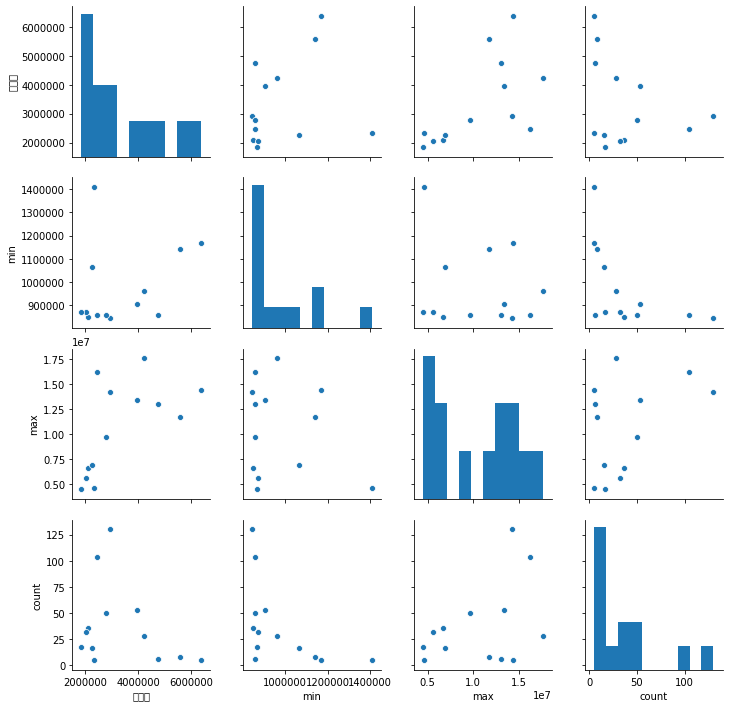